
## 2020 Project: Wind Turbine Power

![Python](python.png)

-----------


-----------

### Submitted by: Valerie Walsh G00364748
### Submission Date: 8th Jan 2021
-----------

### Module: Machine Learning & Statistics
### Course: H.Dip in Computer Science (Data Analytics)
### Institute: Galway-Mayo I.T.
### Lecturer: Ian McLoughlin


-----------
-----------




## Table of Contents
### Introduction
### Statement of Work
### Technology Used
### Background
### Exploring the Data
### Findings
### References



--------------


### Introduction

It is my intention, to use this repository to demonstrate my knowledge with relation to Machine Learning. <br>

The project requires me to <i>"create a web service that uses machine learning to make predictions based on the data set powerproduction"</i>  <br>

The data set has already been supplied by the lecturer and I have added it to this repository as a csv file. I have also added the assessment file to the repository for clarity of the requirements of this assessment. <br>

<i>"The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. <br>
You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests."</i>


***




### Statement of Work

This is a statement to confirm that the work submitted within this repository is my own work.
Any information obtained via 3rd party as apart of my research has been referenced appropriately.
I can therefore confirm that my submitted work is in line with the Quality Assurance Framework of GMIT.


***



### Technology Used

* Jupyter Notebook
* Visual Studio Code
* Anaconda Software package
* Python Programming Language
* Flask (A Python framework)
* Github.com
* Command line interpreteter (Command Prompt)
* LearnOnline / Moodle (*GMIT learning platform)

Note: I have included a more detailed explaination within my README file of how I used the above technology for this project. 


***



### Background

- <b> Why this project? </b>

The project is based upon the provided dataset which contains figures relating to the speed and power output of power production. <br>
The aim of the project is for the student to develop a web service that can make predictions on power production i.e. electricity based on this data set. <br>
This project must all be done using Machine Learning involing HTTP requests which should provide responses with predicted power / output values. 


#### So, what is Machine Learning?

<i>"Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention."</i> https://www.sas.com/en_in/insights/analytics/machine-learning.html

Machine Learning is something which is now being used globally by various industries for the sole purpose of improvement. Its outputs and results allows for businesses to improve on their efficiencies which could relate to production, delivery or logistics. <br>

In this example however, the results are intended to be used to aid calculations of costings for energy production and selling this energy for use on the power grid. As a business, obviously the main intention is to sell the energy with the best possible profit margins and also avoiding incurring any losses due to miscalculations. <br> 

During my research for this project, I have found numerous examples of blog and websites where this same task has been investigated by other individuals using various programming languages. It appears to be a vast area that allows for generating methods to make predictions for wind analysis and renewable energy production. <br>

The overall intention of machine learning is for the programme to develop using data and learning and improving based on the data it receives from consistent analysis. 


![Graph](powervspeed.png)

#### Wind power production

In order for the output to produce, the wind speeds need to be acceptable or optimum levels for a wind turbine to successfully produce power estimates. This can rely on numerous variables including;

* the geographical location of the intended turbines i.e. opened or sheltered areas
* the number of turbines on the combined grid
* weather conditions
* wind turbine direction
* the upkeep / maintenence of the turbines
* the capacity or capabilities of the power generator 
* infrastructure i.e volume of turbines on the grid
* quality of the transformer used to transfer energy from turbine to grid
* the set speed of the turbine blades
* the set level of output for the generator - so as to avoid flooding the grid or over production through the turbines. 

https://www.researchgate.net/post/What-is-the-optimum-wind-speed-to-generate-electricity-by-a-wind-turbine

Based on the research carried out by "Oxford University's Environmental Change Institute", there is little chance of wind speeds being too low to produce energy: <br>
<i>"low wind speeds affect more than half the country for only 10 percent of the time; for 60 percent of the time, only 20 percent of the UK suffers from low wind speeds; and only for one hour per year is 90 percent of the UK suffering low speeds."</i>
https://www.explainthatstuff.com/windturbines.html
<br>

The controller of the wind-turbine determines when the machine starts up. It is reported that in general the turbine will kick-in between 8-16 mph wind speeds and will shut off at a max wind speed of 55mph. Operating at wind speeds higher than this can potentially cause damage to the wind turbines. https://www.energy.gov/maps/how-does-wind-turbine-work <br>
This may be a good explaination fpr if we see high winds speeds in the data set with a zero power production. This may potentially skew the data and results so we may need to eliminate these certain pieces of data when we investigate the set. <br>


-----------
-----------


### Exploring the data

In order to investigate and analyse the data accurately, I will be using the machine-learning library, Scikit-learn to classify, predict and model the dataset. <br>
Scikit-learn is an open-source library for Python programming language that <i>"features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy."</i> https://en.wikipedia.org/wiki/Scikit-learn <br>

Further information relating to this library can be found here: https://scikit-learn.org/
<br>

To get started I am going to import all the relevant libraries that I believe are needed for this research.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Read in the dataset from CSV file
data = pd.read_csv("powerproduction.csv")
print(data)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [3]:
data.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [4]:
data.tail(3)

,speed,power
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [4]:
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [6]:
# Using the below code adapted from https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/
# Output will display the Features and Responses of the dataset. 


# shape of dataset 
print("Shape:", data.shape) 

# column names 
print("\nFeatures:", data.columns) 

# storing the feature matrix (X) and response vector (y) 
X = data[data.columns[:-1]] 
y = data[data.columns[-1]] 

# printing first 5 rows of feature matrix 
print("\nFeature matrix:\n", X.head()) 

# printing first 5 values of response vector 
print("\nResponse vector:\n", y.head())


Shape: (500, 2)

Features: Index(['speed', 'power'], dtype='object')

Feature matrix:
    speed
0  0.000
1  0.125
2  0.150
3  0.225
4  0.275

Response vector:
 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: power, dtype: float64


In [7]:
# Because the above output only includes the 1st 5 rows where power output is 0, I am going to run the above code again 
# But set the head to 8 this time so that some Response outputs contain valid data

# Shape of dataset: number of inputs and columns 
print("Shape:", data.shape) 

# The column names as per the dataset
print("\nFeatures:", data.columns) 

# storing the feature matrix (X) and response vector (y) 
X = data[data.columns[:-1]] 
y = data[data.columns[-1]] 

# Re-running the code to print out 8 values of the feature matrix 
print("\nFeature matrix:\n", X.head(8)) 

# Re-running the code to print out 8 values of the response vector
print("\nResponse vector:\n", y.head(8))

# I noticed with the below output that under the title "Feature matrix" you can see speed as the printed head of the speed column
# However the same does not occur with the power column as the word is missing from the "Response vector" print out.


Shape: (500, 2)

Features: Index(['speed', 'power'], dtype='object')

Feature matrix:
    speed
0  0.000
1  0.125
2  0.150
3  0.225
4  0.275
5  0.325
6  0.400
7  0.450

Response vector:
 0    0.000
1    0.000
2    0.000
3    0.000
4    0.000
5    4.331
6    5.186
7    3.826
Name: power, dtype: float64


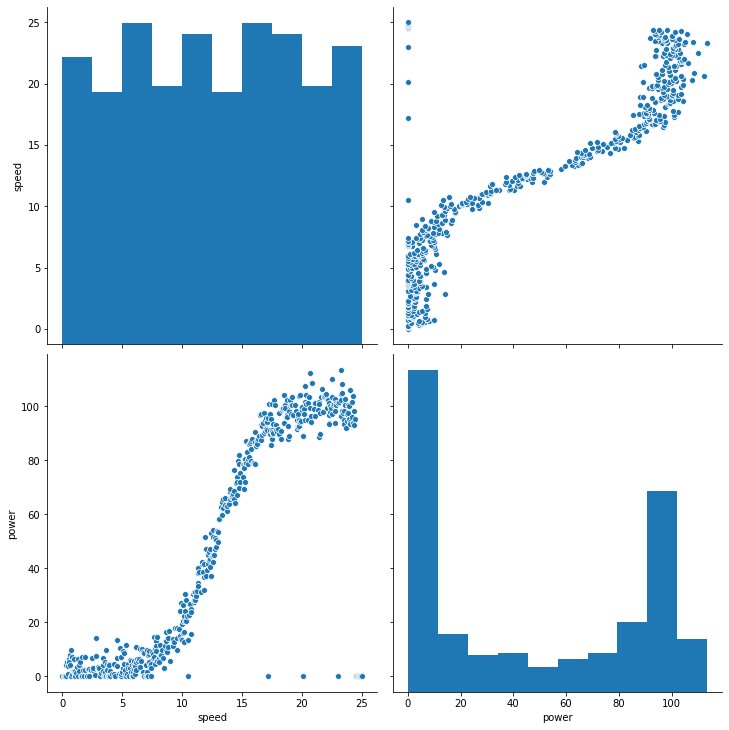

In [8]:
sns.pairplot(data, height=5)

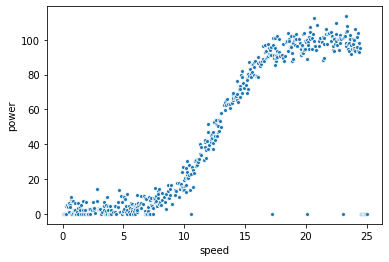

In [9]:
# I used seaborn to create a basic scatter plot to view the data
sns.scatterplot(data=data, x = "speed", y = "power", s=15)
            

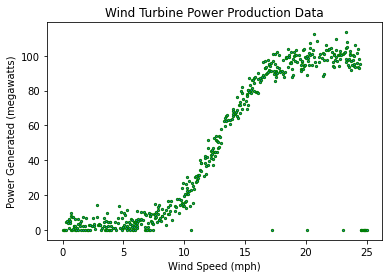

In [10]:
# Identified a more indepth scatterplot example during my research, plotting this also for better visibility of the data.

# "Scatter Plots are usually used to represent the correlation between two or more variables. 
# It also helps it identify Outliers, if any."
# https://medium.com/python-pandemonium/data-visualization-in-python-scatter-plots-in-matplotlib-da90ac4c99f9

speed = data['speed']
power = data['power']
plt.scatter(speed, power, edgecolors='g', s=5)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Power Generated (megawatts)')
plt.title('Wind Turbine Power Production Data')
plt.show()

Based on the plotted information above, you can see there are apparent outliers where alot of points are outputting 0 in terms of power / watts produced. These outliers are points that may skew the output as false information and therefore provide false results. <br>

Some reasons as to why this may have occured include:
* Errors in data recording i.e. human error
* Misrecordings
* Wind speeds being too low or too high i.e. safety cut-off point

It may be best to try disregard these points in the reviewing of the data so as to only include those that are producing power when wind speeds are recorded. <br> 
As mentioned earlier in the notebook, power production can only commence in wind turbines when the wind speeds are 0ver 8-16mph and less than 55mph, however, based in the dataset breakdown, there is wind speeds recorded in the 20's that also have a 0 power output so it is best in this instance, to remove all instances where power production output is 0. <br>

#### Cleaning the data



In [11]:
# Index info for the dataset
data.columns

Index(['speed', 'power'], dtype='object')

In [6]:
# Selecting the values where power is 0 where the speed values are between 8-55 mph
data2 = data[(data['power'] == 0 ) & (data['speed'] > 8) & (data['speed'] < 55)]
print(data2)

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


In [13]:
# The above request outputs that there are 14 instances of acceptable wind speeds with 0 power output. 

data2.count()

speed    14
power    14
dtype: int64

In [8]:
# For clarity and to ensure accurate calculations in my research, I am going to choose to remove all instances of power being 0 
# from the dataset.

# Selecting the values where power is 0 where the speed values are between 8-55 mph
cleandata = data[(data['power'] == 0 )]
print (cleandata)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
15    0.726    0.0
16    0.751    0.0
24    1.026    0.0
26    1.076    0.0
31    1.301    0.0
35    1.552    0.0
37    1.677    0.0
39    1.827    0.0
42    2.027    0.0
43    2.077    0.0
44    2.102    0.0
47    2.252    0.0
60    3.128    0.0
65    3.504    0.0
67    3.579    0.0
70    3.679    0.0
73    3.779    0.0
74    3.804    0.0
75    3.879    0.0
83    4.429    0.0
89    4.880    0.0
105   5.556    0.0
110   5.781    0.0
111   5.806    0.0
114   5.931    0.0
133   6.782    0.0
135   6.857    0.0
136   6.957    0.0
140   7.107    0.0
149   7.432    0.0
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


In [23]:
# There are 49 instances in the dataset where the power output is set to 0. 

cleandata.count()

speed    49
power    49
dtype: int64

In [12]:
# Cleaning the dataset by removing all instances of power = 0

index = data[(data['power'] == 0)].index
data.drop(index, inplace=True)

In [14]:
# Gathering info for the new dataset to confirm the previous call worked
# Currently have a dataset with 451 values as expected now that the 49 outliers are removed.
data.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


<AxesSubplot:xlabel='speed', ylabel='power'>

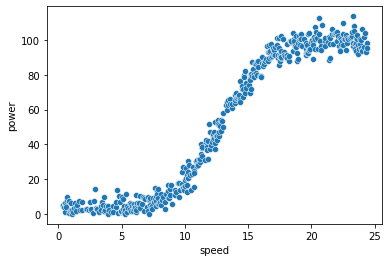

In [15]:
sns.scatterplot(x='speed',y='power',data = data)

Now that we have a dataset with useable values, I will attempt to fit linear regression against the dataset via plotting.

#### Linear Regression

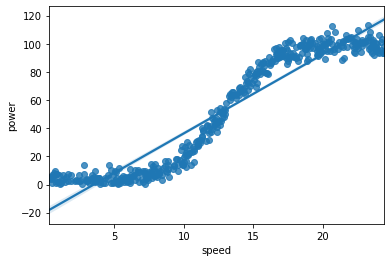

In [16]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html

# Using the code from the above link to output linear regression with the dataset.

sns.regplot(x='speed',y='power',data = data)
plt.show()

Having plotted the above, I can see that linear regression is not an appropriate fit for this model. I will plot polynominal and view this as an output. <br>

#### Polynominal Regression

In [34]:
# Roughwork for next workings on the notebook 

# https://www.w3schools.com/python/python_ml_polynomial_regression.asp
# https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386


# polynominal regression
# cost
# train the dataset

# https://machinelearningmastery.com/train-to-the-test-set-in-machine-learning/
# https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
# https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/
# https://data-flair.training/blogs/train-test-set-in-python-ml/
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
# https://scikit-learn.org/stable/model_selection.html#model-selection
# 

# https://codekarim.com/node/39
# Code used to adapt to use for Test and Train the dataset


msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [32]:
# https://codekarim.com/node/39

# Adapted the code from this link in order to determine Polynominal info for the dataset.

train_x = np.asanyarray(train[['speed']])
train_y = np.asanyarray(train[['power']])

test_x = np.asanyarray(test[['speed']])
test_y = np.asanyarray(test[['power']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 3.25000000e-01, 1.05625000e-01],
       [1.00000000e+00, 4.00000000e-01, 1.60000000e-01],
       [1.00000000e+00, 4.50000000e-01, 2.02500000e-01],
       ...,
       [1.00000000e+00, 2.43490000e+01, 5.92873801e+02],
       [1.00000000e+00, 2.43740000e+01, 5.94091876e+02],
       [1.00000000e+00, 2.43990000e+01, 5.95311201e+02]])

In [30]:
# https://codekarim.com/node/39


from sklearn import linear_model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[0.         5.01733617 0.02363343]]
Intercept:  [-17.11399462]


Having identified the Coefficients and the Intercept of the dataset, I will now use the code from the same referenced site to plot the data and view it against the line.

Text(0, 0.5, 'Power')

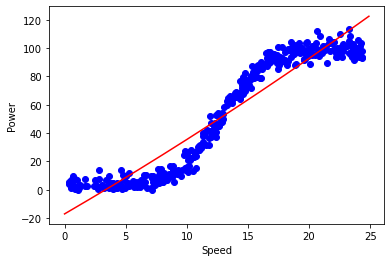

In [38]:
# https://codekarim.com/node/39

plt.scatter(train.speed, train.power,  color='blue')
XX = np.arange(0.0, 25.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Speed")
plt.ylabel("Power")

Visually this does not appear to be a polynominal output and rather a linear regression against the data as it appears to be a straight line. I will revisit this again in the future to try adjust and rectify the output to be expected. 

#### Metrics and Scoring

In [40]:
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

# I have attempted to use code that was explained within lecture notes and located on the referenced repository link. 
# I have used the designed code to attempt to fit the model to random lines but output error is preventing this from outputting.
# I will attempt to revisit if time allows to investigate and troubleshoot this issue further.

# Plot w versus d with black dots.
plt.plot(x='speed', y='power', 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 6.0 * x + 15.0, 'r-', label=r"$6x + 15$")
plt.plot(x, 3.0 * x + 20.0, 'g-', label=r"$3x + 20$")
plt.plot(x, 8.0 * x + 10.0, 'b-', label=r"$8x + 10$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Speed (MPH')
plt.ylabel('Power (MW)')

# Show the plot.
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-40-b28bea5767f0>, line 8)

In [ ]:
# In an attempt to select the best line for the model, it is good practice to identify which is the best fit to the data
# This refers to identifying the cost of each line i.e. the higher the cost, the poorer the score of the fit. 

# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb


cost = lambda m,c: np.sum([(d[i] - m * x[i] - c)**2 for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0, 15.0, cost(6.0, 15.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (3.0,  20.0, cost(3.0,  20.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (8.0, 10.0, cost(8.0, 10.0)))

#### Train / Test the dataset

![Train_Test](traintest.png)

In [1]:
# Train / Test model
# https://www.w3schools.com/python/python_ml_train_test.asp
# https://data-flair.training/blogs/train-test-set-in-python-ml/

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]



NameError: name 'x' is not defined

In [16]:
# I found an interesting article where the publisher used normalisation on a dataset in a CSV
# I was unable to get the code to work through my own means due to output errors relating to tensorflow installation on my machine
# I am using this code to alter it to use for my own research with the powerproduction.csv file
# https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjI1MmZjYjk3ZGY1YjZiNGY2ZDFhODg1ZjFlNjNkYzRhOWNkMjMwYzUiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2MDk5MTI4ODMsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExMTQ4NjYxOTgxNjk0NjA3MDQ2MSIsImVtYWlsIjoidmFsZXJpZS5wb29sZUBnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IlZhbGVyaWUgV2Fsc2giLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EtL0FPaDE0R2hRdnBoZFlWZjZSUVV1Y05NbXJwN3dFZUwxcGhxc3Nmd09FLVJIQ0E9czk2LWMiLCJnaXZlbl9uYW1lIjoiVmFsZXJpZSIsImZhbWlseV9uYW1lIjoiV2Fsc2giLCJpYXQiOjE2MDk5MTMxODMsImV4cCI6MTYwOTkxNjc4MywianRpIjoiMTIxYjZjYjM3YWY3MWI3OWJjMmFjZDRiYmQ2OWRmNmU0YjFkODkzMiJ9.JgfQ1PO59XCFCSAaUtluQrGpkcfrm4SzRjbq3XW7cVb31w1h7SY9t-_waSnxifn9HRoGCWru2JG_V1R3dHiIM0UJIhwZUoyLJU46RUxvac6Dck-zvOd15WQ7Q1PVHJGbRkg2_arSTW41D_BU96gGtUbe7IUpFz9T933nmYnRl326srZW6Ar4MwdeegalYDyLsIrn-esZwKJZRGvbNgsW7I20pCD7vLCU7ITVbVJiA-WbW8cFUwWbFut938lRcwAD--0XcMlnKYkMfS3SteT_2wBANgaWj5czgH3c8kCLc8lKpZwUCwzeYOoD4zqU5g-8Dhd3Ylgr9r_Y56e8vEnJMQ

# Tensorflow was not installed on my machine to complete this code, the issue was resolved using assistance from the following link:
# https://stackoverflow.com/questions/42244198/importerror-no-module-named-tensorflow

import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import Dataset
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers

#Read the data from csv file
df = pd.read_csv('powerproduction.csv')

#Select predictors
x = df[df.columns[:54]]

#Target variable 
y = df.Cover_Type

#Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)
'''As y variable is multi class categorical variable, hence using softmax as activation function and sparse-categorical cross entropy as loss function.'''
model = keras.Sequential([
 keras.layers.Dense(64, activation=tf.nn.relu,                  
 input_shape=(x_train.shape[1],)),
 keras.layers.Dense(64, activation=tf.nn.relu),
 keras.layers.Dense(8, activation=  'softmax')
 ])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1 = model.fit(
 x_train, y_train,
 epochs= 26, batch_size = 60,
 validation_data = (x_test, y_test))

# Unable to install tensorsflow due to consistent error messages, will revisit this code again later

ModuleNotFoundError: No module named 'tensorflow'

#### How do you train a dataset?

<i>"The training dataset is used to prepare a model, to train it. We pretend the test dataset is new data where the output values are withheld from the algorithm. We gather predictions from the trained model on the inputs from the test dataset and compare them to the withheld output values of the test set."</i> https://machinelearningmastery.com/train-final-machine-learning-model/

-----------
-----------


### Findings

Having removed the outliers with no power generation, we are able to get a better visualisation of the useable data. <br>
Also having a cleaner data set allows for a more accurate and reliable output when it comes to training and testing the dataset. <br>






-----------
-----------


### Conclusion

In my research, I have lerned



---------


### References
* https://www.sas.com/en_in/insights/analytics/machine-learning.html
* https://www.researchgate.net/post/What-is-the-optimum-wind-speed-to-generate-electricity-by-a-wind-turbine
* https://www.explainthatstuff.com/windturbines.html
* https://www.energy.gov/maps/how-does-wind-turbine-work
* https://en.wikipedia.org/wiki/Scikit-learn
* https://scikit-learn.org/
* https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/
* https://medium.com/python-pandemonium/data-visualization-in-python-scatter-plots-in-matplotlib-da90ac4c99f9
* https://www.w3schools.com/python/python_ml_train_test.asp
* https://data-flair.training/blogs/train-test-set-in-python-ml/
* https://machinelearningmastery.com/train-final-machine-learning-model/
* Calculating energy production from weather forecast in Python - https://medium.com/planet-os/calculating-energy-production-from-weather-forecast-in-python-3c990047daa
* Example Wind Resource Assessment Using Python - https://www.kaggle.com/coryjog/example-wind-analysis-in-python
* An introduction to the Flask Python web app framework - https://opensource.com/article/18/4/flask
* 
* 

--------------------------

### END